# Mapping in Python

In [1]:
from IPython.display import Image, HTML

In [2]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

### use the inline backend

In [3]:
%matplotlib inline

### import Basemap 

In [5]:
from mpl_toolkits.basemap import Basemap as bm
from mpl_toolkits.basemap import supported_projections, projection_params 

In [7]:
print(supported_projections)

 tmerc            Transverse Mercator                     
 cyl              Cylindrical Equidistant                 
 stere            Stereographic                           
 aea              Albers Equal Area                       
 cea              Cylindrical Equal Area                  
 splaea           South-Polar Lambert Azimuthal           
 spaeqd           South-Polar Azimuthal Equidistant       
 moll             Mollweide                               
 npstere          North-Polar Stereographic               
 robin            Robinson                                
 merc             Mercator                                
 laea             Lambert Azimuthal Equal Area            
 npaeqd           North-Polar Azimuthal Equidistant       
 eck4             Eckert IV                               
 nplaea           North-Polar Lambert Azimuthal           
 omerc            Oblique Mercator                        
 sinu             Sinusoidal                            

In [8]:
projection_params['merc']

'corners plus lat_ts (no width/height)'

### Draw basemap of a region with a bathymetric and topographic overlay

defines the parameters for the *Mercator* projection

In [9]:
llcrnrlat = -50 # lower left corner latitude 
urcrnrlat = 20 # upper right corner latitude 

llcrnrlon = 150 # lower left corner longitude
urcrnrlon = 290 # upper right corner longitude

lat_ts = -40 # true scale latitude

#### initialises the projection

In [10]:
m = bm(projection='merc',\
            llcrnrlat=llcrnrlat,\
            urcrnrlat=urcrnrlat,\
            llcrnrlon=llcrnrlon,\
            urcrnrlon=urcrnrlon,\
            lat_ts=lat_ts,\
            resolution='i', \
            area_thresh=100)

In [13]:
import os
import pickle

In [14]:
if not os.path.exists('./basemap.p'): 
    pickle.dump(m, open('./basemap.p','wb'))
else:
    m = pickle.load('./basemap.p','rb')

and now plots

/Users/nicolasf/anaconda/envs/IOOS/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3310: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/nicolasf/anaconda/envs/IOOS/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3319: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


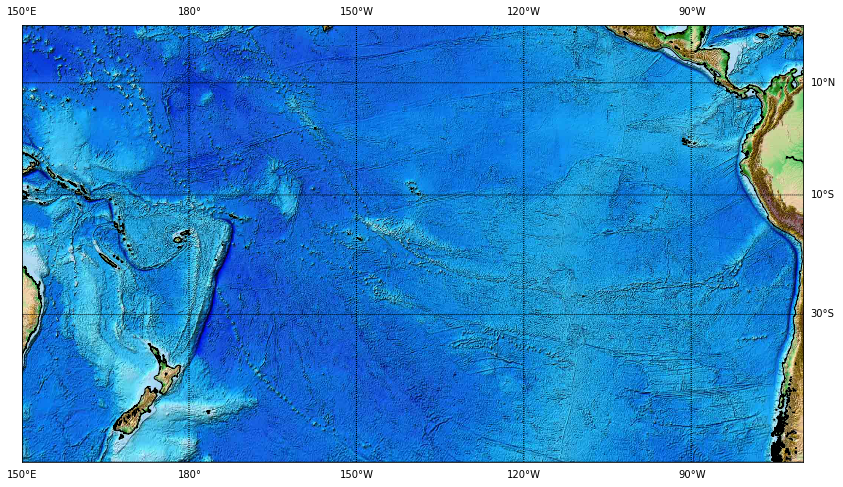

In [16]:
f, ax = plt.subplots(figsize=(14,10))

m.ax = ax # the axes in which the map needs to be embedded

m.etopo() # draw bathymetry and topography

m.drawcoastlines()

parallels = np.arange(llcrnrlat, urcrnrlat, 20)

m.drawparallels(parallels, labels=[False,True,False,False]) # left, right, top, bottom

meridians = np.arange(llcrnrlon, urcrnrlon, 30)

m.drawmeridians(meridians,  labels=[False,False,True,True]) # left, right, top, bottom

plt.show()

### overlay data on a basemap

In [41]:
import xarray as xr

In [42]:
url = 'http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/interp_OLR/olr.mon.mean.nc'

In [43]:
dset = xr.open_dataset(url)

In [44]:
dset

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 475)
Coordinates:
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 12.5 15.0 17.5 20.0 22.5 ...
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 77.5 75.0 72.5 70.0 67.5 ...
  * time     (time) datetime64[ns] 1974-06-01 1974-07-01 1974-08-01 ...
Data variables:
    olr      (time, lat, lon) float64 ...
Attributes:
    title:                           Monthly means of OLR from interpolated O...
    history:                         Created from daily OLR files obtained at...
    description:                     Data is interpolated in time and space f...
    platform:                        Observation
    Conventions:                     CF-1.2
    References:                      https://www.esrl.noaa.gov/psd/data/gridd...
    references:                      https://www.esrl.noaa.gov/psd/data/gridd...
    Citation:                        Liebmann and Smith: June 2006: Descripti...
    dataset_title:                   NOAA Inter

In [45]:
dset = dset.sel(lat=slice(20, -50), lon=slice(150, 290), time='1998-1')

In [46]:
dset

<xarray.Dataset>
Dimensions:  (lat: 29, lon: 57, time: 1)
Coordinates:
  * lon      (lon) float32 150.0 152.5 155.0 157.5 160.0 162.5 165.0 167.5 ...
  * lat      (lat) float32 20.0 17.5 15.0 12.5 10.0 7.5 5.0 2.5 0.0 -2.5 ...
  * time     (time) datetime64[ns] 1998-01-01
Data variables:
    olr      (time, lat, lon) float64 ...
Attributes:
    title:                           Monthly means of OLR from interpolated O...
    history:                         Created from daily OLR files obtained at...
    description:                     Data is interpolated in time and space f...
    platform:                        Observation
    Conventions:                     CF-1.2
    References:                      https://www.esrl.noaa.gov/psd/data/gridd...
    references:                      https://www.esrl.noaa.gov/psd/data/gridd...
    Citation:                        Liebmann and Smith: June 2006: Descripti...
    dataset_title:                   NOAA Interpolated Outgoing Longwave Radi.

In [47]:
olr = dset['olr'].squeeze()

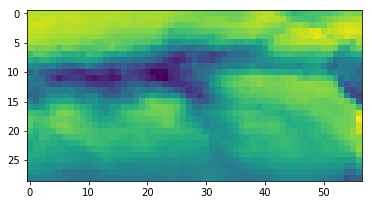

In [49]:
plt.imshow(olr)

#### get the longitudes and latitude vectors

In [51]:
lon = dset['lon']

In [52]:
lat = dset['lat']

In [53]:
lons, lats = np.meshgrid(lon, lat)

#### using pcolormesh (gridded faceted plot)

/Users/nicolasf/anaconda/envs/IOOS/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3435: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/nicolasf/anaconda/envs/IOOS/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3444: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


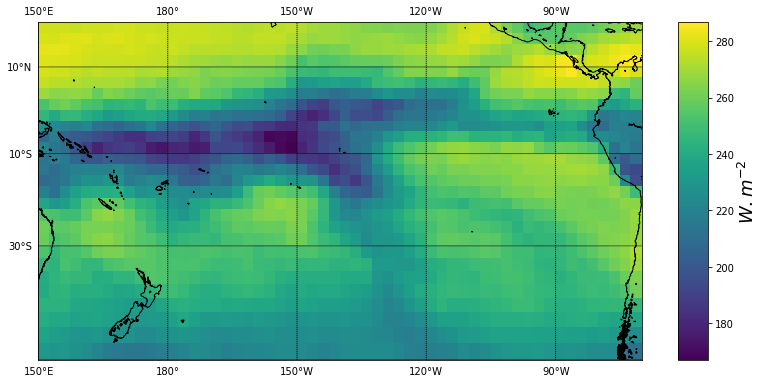

In [60]:
f, ax = plt.subplots(figsize=(12,8))

m.ax = ax

mlon,mlat = np.meshgrid(lon,lat) # turns lat and lon vectors into grids

im = m.pcolormesh(lons, lats, olr, latlon=True)

m.drawcoastlines()

parallels = np.arange(llcrnrlat, urcrnrlat, 20)

m.drawparallels(parallels, labels=[1,0,0,0]) # left, right, top, bottom

# m.drawparallels(parallels, labels=[True,False,False,False]) # this works too

meridians = np.arange(llcrnrlon, urcrnrlon, 30)

m.drawmeridians(meridians,  labels=[0,0,1,1]) # left, right, top, bottom

cb = m.colorbar(im, pad='6%')
cb.set_label(r'$W.m^{-2}$', fontsize=18)

plt.show()

#### using contourf (filled contours)

/Users/nicolasf/anaconda/envs/IOOS/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3630: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/nicolasf/anaconda/envs/IOOS/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3699: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


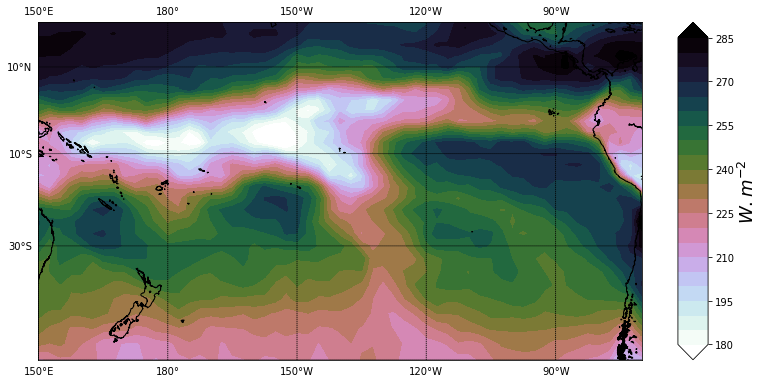

In [63]:
from mpl_toolkits.basemap import Basemap

f, ax = plt.subplots(figsize=(12,8))

m.ax = ax

im = m.contourf(lons, lats, olr, np.arange(180, 290, 5), latlon=True, extend='both')

# Choosing another colormap (see http://matplotlib.org/users/colormaps.html) is easy:
# im = m.contourf(lons, lats, olr, np.arange(180, 290, 5), latlon=True, extend='both', cmap=plt.get_cmap('cubehelix_r'))

m.drawcoastlines()

parallels = np.arange(llcrnrlat, urcrnrlat, 20)

m.drawparallels(parallels, labels=[1,0,0,0]) # left, right, top, bottom

meridians = np.arange(llcrnrlon, urcrnrlon, 30)

m.drawmeridians(meridians,  labels=[0,0,1,1]) # left, right, top, bottom

cb = m.colorbar(im, pad='6%')
cb.set_label(r'$W.m^{-2}$', fontsize=18)

plt.show()

/Users/nicolasf/anaconda/envs/IOOS/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3630: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/nicolasf/anaconda/envs/IOOS/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3699: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/nicolasf/anaconda/envs/IOOS/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3527: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/nicolasf/anaconda/envs/IOOS/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3594: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


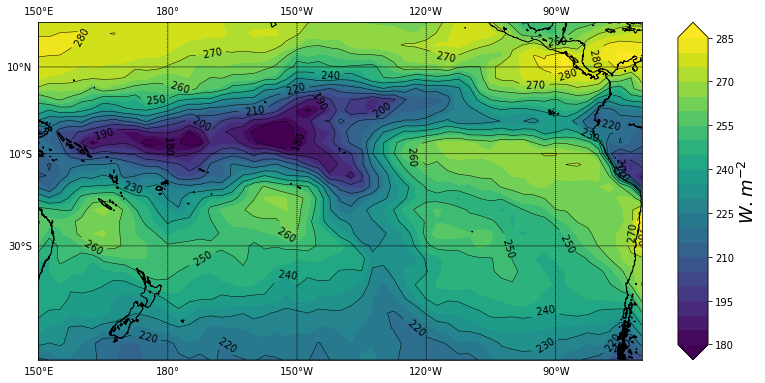

In [62]:
from mpl_toolkits.basemap import Basemap

f, ax = plt.subplots(figsize=(12,8))

m.ax = ax

im = m.contourf(lons, lats, olr, np.arange(180, 290, 5), latlon=True, extend='both')

cs = m.contour(lons, lats, olr, np.arange(180, 290, 10), latlon=True, colors='k', linewidths=0.5)

plt.clabel(cs, colors='k', fmt="%4i")

# Choosing another colormap (see http://matplotlib.org/users/colormaps.html) is easy:
# im = m.contourf(mlon, mlat, olr, np.arange(180, 290, 5), latlon=True, cmap=plt.get_cmap('cubehelix_r'))

m.drawcoastlines()

parallels = np.arange(llcrnrlat, urcrnrlat, 20)

m.drawparallels(parallels, labels=[1,0,0,0]) # left, right, top, bottom

meridians = np.arange(llcrnrlon, urcrnrlon, 30)

m.drawmeridians(meridians,  labels=[0,0,1,1]) # left, right, top, bottom

cb = m.colorbar(im, pad='6%')
cb.set_label(r'$W.m^{-2}$', fontsize=18)

plt.show();